 # Dojo : Prédiction du Cancer du Poumon et Optimisation des Hyperparamètres



 **Contexte :**

 Ce notebook a pour objectif de mettre en œuvre un pipeline de machine learning sur le jeu de données "Lung Cancer Prediction Dataset" [(à télécharger sur Kaggle)](https://www.kaggle.com/code/devraai/lung-cancer-risk-prediction-analysis).



 **Étapes couvertes :**

 1. Exploration et prétraitement des données

 2. Séparation du jeu de données

 3. Modélisation avec différents classifieurs

 4. Évaluation des performances

 5. Optimisation des hyperparamètres avec GridSearchCV



 *Bonus :* Visualisations (matrices de confusion, courbes ROC) et comparaison de plusieurs algorithmes.

 ## 1. Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pour la séparation et l'optimisation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modèles de classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Évaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_curve, auc, classification_report)


 ## 2. Chargement et exploration du dataset



 **Remarque :** Assurez-vous que le fichier du dataset (par exemple `lung_cancer_prediction.csv`) se trouve dans le même répertoire que ce notebook.

In [2]:
# Charger le dataset (à adapter selon le nom du fichier et la localisation)
df = pd.read_csv("lung_cancer_prediction.csv")
print("Aperçu des 5 premières lignes du dataset :")
display(df.head())

print("\nInformations générales sur le dataset :")
df.info()

print("\nStatistiques descriptives :")
display(df.describe())

print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())


Aperçu des 5 premières lignes du dataset :


,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES



Informations générales sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14 

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.204000,0.209600
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.403009,0.407064
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.000000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.000000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,0.000000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.000000



Valeurs manquantes par colonne :
AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64


 ## 3. Prétraitement des données



 **a) Gestion des valeurs manquantes**

 Ici, nous choisissons de remplir les valeurs manquantes numériques par la médiane et celles des variables catégorielles par la valeur la plus fréquente.

In [3]:
# Séparation des colonnes numériques et catégorielles
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Imputation pour colonnes numériques
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Imputation pour colonnes catégorielles
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)


 **b) Encodage des variables catégorielles**

 Nous appliquons ici un encodage par LabelEncoder parce que nous avons que deux classes (classification binaire). Selon le cas, un encodage One-Hot pourrait être utilisé.

In [4]:
for col in cat_cols:
    print(f"Encodage de la variable {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


Encodage de la variable PULMONARY_DISEASE


 **c) Normalisation/Standardisation**

 Nous standardisons les variables explicatives pour aider les algorithmes sensibles à l'échelle.

In [ ]:
# Identifier la colonne cible. Adaptez le nom de la colonne cible selon votre dataset.
# Ici, la colonne cible s'appelle "PULMONARY_DISEASE" et prend des valeurs binaires (0 = pas de cancer, 1 = cancer).
target_col = "PULMONARY_DISEASE"

# Vérifier si la colonne cible existe
if target_col not in df.columns:
    raise ValueError(f"Veuillez vérifier le nom de la colonne cible. '{target_col}' n'est pas présent dans le dataset.")

# Séparation des features et de la cible
X = df.drop(target_col, axis=1)
y = df[target_col]

# Standardisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 ## 4. Séparation du jeu de données



 Nous utilisons ici une répartition 80% entraînement / 20% test.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)


Taille de l'ensemble d'entraînement : (4000, 17)
Taille de l'ensemble de test : (1000, 17)


 ## 5. Modélisation et évaluation



 Nous allons entraîner trois modèles :

 - Régression logistique

 - Arbre de décision

 - Forêt aléatoire



 Pour chacun, nous calculerons les métriques d’évaluation et afficherons la matrice de confusion ainsi que la courbe ROC.

### 5.1. Régression Logistique

La régression logistique est un algorithme de classification qui modélise la probabilité qu'une instance appartienne à une classe particulière.

**Principes de fonctionnement :**
- Modèle linéaire qui utilise la fonction sigmoïde pour transformer une combinaison linéaire des caractéristiques en probabilité (entre 0 et 1)
- La fonction sigmoïde : $P(y=1|x) = \frac{1}{1+e^{-z}}$ où $z = w₀ + w₁x₁ + w₂x₂ + ... + w_nx_n$
- Classification binaire : si $P(y=1|x) > 0.5$, la prédiction est la classe 1, sinon c'est la classe 0
- Les coefficients du modèle sont estimés par maximum de vraisemblance

**Avantages :**
- Interprétabilité (les coefficients indiquent l'importance et le sens de l'influence de chaque variable)
- Efficace pour les grands jeux de données
- Fournit des probabilités bien calibrées
- Peu sensible au bruit

**Limites :**
- Assume une relation linéaire entre les variables et le log-odds de la variable cible
- Ne peut pas modéliser des relations complexes non linéaires sans transformation préalable
- Sensible à la multicolinéarité et aux valeurs aberrantes

Pour la prédiction du cancer du poumon, la régression logistique évalue l'influence de chaque facteur de risque sur la probabilité de développer la maladie.

=== Régression Logistique ===
Exactitude : 0.887
Précision  : 0.8483412322274881
Rappel     : 0.8796068796068796
F1 Score   : 0.8636911942098915

Rapport de classification :
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       593
           1       0.85      0.88      0.86       407

    accuracy                           0.89      1000
   macro avg       0.88      0.89      0.88      1000
weighted avg       0.89      0.89      0.89      1000



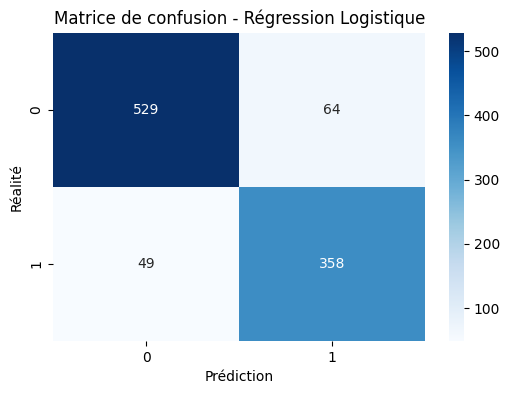

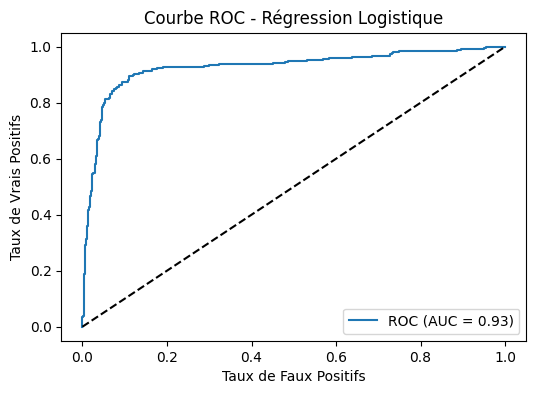

In [ ]:
# Modèle : Régression logistique
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Évaluation
print("=== Régression Logistique ===")
print("Exactitude :", accuracy_score(y_test, y_pred_lr))
print("Précision  :", precision_score(y_test, y_pred_lr))
print("Rappel     :", recall_score(y_test, y_pred_lr))
print("F1 Score   :", f1_score(y_test, y_pred_lr))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_lr))

# Matrice de confusion
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Régression Logistique")
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.show()

# Courbe ROC
y_probs_lr = lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(6,4))
plt.plot(fpr_lr, tpr_lr, label=f'ROC (AUC = {roc_auc_lr:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC - Régression Logistique")
plt.legend(loc="lower right")
plt.show()


La régression logistique montre de bonnes performances pour la prédiction du cancer du poumon avec une exactitude (accuracy) de 88.7%. Les métriques clés indiquent:

- **Précision**: 84.8% - Sur tous les cas prédits comme positifs, 84.8% sont correctement identifiés
- **Rappel**: 88.0% - Sur tous les cas réellement positifs, 88.0% sont détectés par le modèle
- **F1-Score**: 86.4% - Moyenne "harmonique" entre précision et rappel.

La matrice de confusion et la courbe ROC montrent que le modèle distingue bien entre les cas positifs et négatifs. L'AUC (aire sous la courbe ROC) confirme le bon pouvoir discriminant du modèle.

Pour le dépistage du cancer, le rappel élevé est particulièrement important car il minimise les faux négatifs, ce qui est crucial dans un contexte médical où ne pas détecter un cancer peut avoir des conséquences graves.

 ### 5.2. Arbre de Décision

L'arbre de décision est un algorithme d'apprentissage supervisé qui fonctionne en divisant récursivement les données en sous-ensembles de plus en plus homogènes.

**Principes de fonctionnement :**
- Structure hiérarchique avec des nœuds de décision et des feuilles (prédictions)
- À chaque nœud, l'algorithme choisit la caractéristique et le seuil qui permettent la meilleure séparation des données
- La division se fait en maximisant la réduction d'impureté (Gini, entropie)
- Le processus continue jusqu'à atteindre un critère d'arrêt (profondeur maximale, nombre minimum d'échantillons)

**Avantages :**
- Facilement interprétable (modèle "boîte blanche")
- Gère naturellement les variables catégorielles et numériques
- Peu sensible à l'échelle des données
- Capture les relations non linéaires entre variables

**Limites :**
- Tendance au surapprentissage si non élagué
- Instabilité (sensible aux petites variations dans les données)
- Performance parfois limitée sur des problèmes complexes
- Faible robustesse aux valeurs aberrantes

L'arbre construit pour la prédiction du cancer du poumon établit des règles de décision basées sur les facteurs de risque et les symptômes pour déterminer la probabilité de présence de la maladie.

=== Arbre de Décision ===
Exactitude : 0.804
Précision  : 0.7604938271604939
Rappel     : 0.7567567567567568
F1 Score   : 0.7586206896551724

Rapport de classification :
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       593
           1       0.76      0.76      0.76       407

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



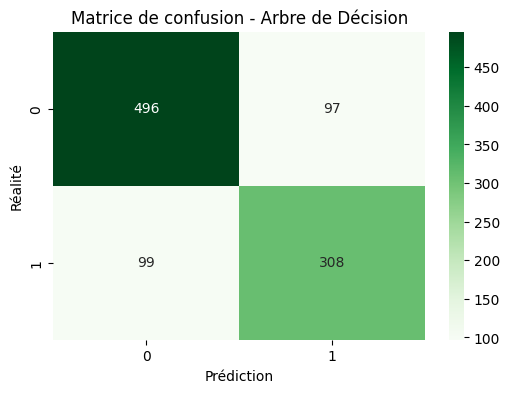

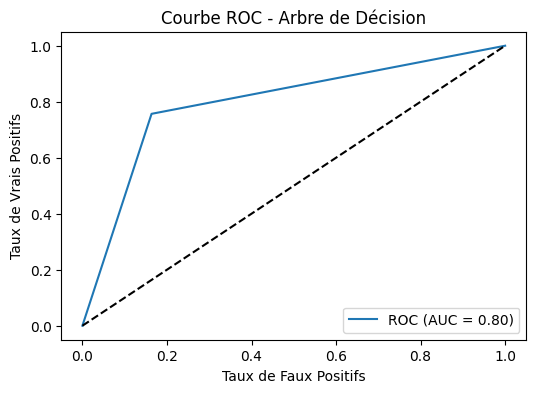

In [8]:
# Modèle : Arbre de décision
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Évaluation
print("=== Arbre de Décision ===")
print("Exactitude :", accuracy_score(y_test, y_pred_dt))
print("Précision  :", precision_score(y_test, y_pred_dt))
print("Rappel     :", recall_score(y_test, y_pred_dt))
print("F1 Score   :", f1_score(y_test, y_pred_dt))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_dt))

# Matrice de confusion
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title("Matrice de confusion - Arbre de Décision")
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.show()

# Courbe ROC
if hasattr(dt, "predict_proba"):
    y_probs_dt = dt.predict_proba(X_test)[:,1]
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    plt.figure(figsize=(6,4))
    plt.plot(fpr_dt, tpr_dt, label=f'ROC (AUC = {roc_auc_dt:.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("Taux de Faux Positifs")
    plt.ylabel("Taux de Vrais Positifs")
    plt.title("Courbe ROC - Arbre de Décision")
    plt.legend(loc="lower right")
    plt.show()


L'arbre de décision montre des performances plus modestes que la régression logistique pour la prédiction du cancer du poumon, avec une exactitude de 80.4%. Les métriques clés révèlent:

- **Précision**: 76.0% - Le modèle a plus de difficultés à distinguer les vrais cas positifs.
- **Rappel**: 75.7% - Environ un quart des cas réellement positifs ne sont pas détectés.
- **F1-Score**: 75.9% - Indiquant un équilibre entre précision et rappel plus faible.

La matrice de confusion montre une distribution relativement équilibrée des erreurs entre faux positifs et faux négatifs. La courbe ROC confirme cette performance moyenne avec une AUC inférieure à celle de la régression logistique.

Cette différence de performance pourrait s'expliquer par la tendance des arbres de décision au surapprentissage lorsqu'ils ne sont pas élagués ou paramétrés correctement. L'optimisation des hyperparamètres (profondeur maximale, nombre minimum d'échantillons par feuille, etc.) pourrait améliorer ces résultats. La forêt aléatoire qui suit devrait théoriquement donner de meilleurs résultats en réduisant le surapprentissage par son approche d'ensemble.

### 5.3. Forêt Aléatoire

La forêt aléatoire (Random Forest) est un algorithme d'apprentissage ensembliste qui combine plusieurs arbres de décision pour améliorer la précision et réduire le risque de surapprentissage.

**Principes de fonctionnement :**
- Agrégation de nombreux arbres de décision indépendants
- Chaque arbre est construit avec un sous-échantillon aléatoire des données (bagging)
- À chaque nœud, seul un sous-ensemble aléatoire des caractéristiques est considéré
- La prédiction finale est obtenue par vote majoritaire (classification) ou moyenne (régression)

**Avantages :**
- Robuste contre le surapprentissage
- Gère bien les données à haute dimension
- Fournit des mesures d'importance des variables
- Peu sensible aux valeurs aberrantes
- Très performant sur de nombreux types de problèmes

=== Forêt Aléatoire ===
Exactitude : 0.903
Précision  : 0.8894472361809045
Rappel     : 0.8697788697788698
F1 Score   : 0.8795031055900621

Rapport de classification :
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       593
           1       0.89      0.87      0.88       407

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



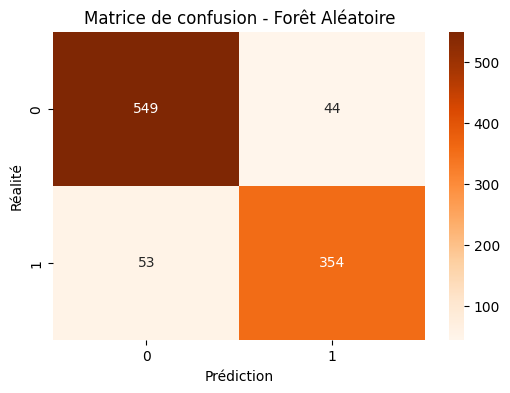

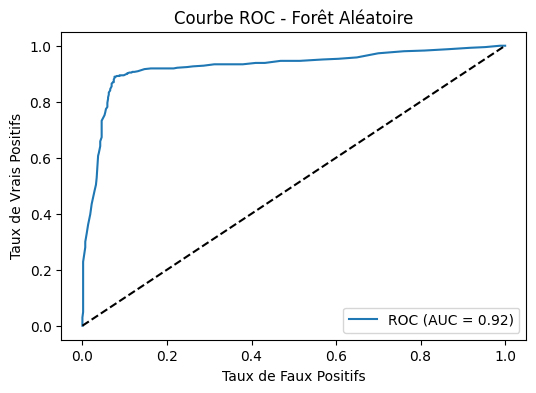

In [9]:
# Modèle : Forêt aléatoire
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Évaluation
print("=== Forêt Aléatoire ===")
print("Exactitude :", accuracy_score(y_test, y_pred_rf))
print("Précision  :", precision_score(y_test, y_pred_rf))
print("Rappel     :", recall_score(y_test, y_pred_rf))
print("F1 Score   :", f1_score(y_test, y_pred_rf))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_rf))

# Matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.title("Matrice de confusion - Forêt Aléatoire")
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.show()

# Courbe ROC
y_probs_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f'ROC (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC - Forêt Aléatoire")
plt.legend(loc="lower right")
plt.show()


La forêt aléatoire montre les meilleures performances parmi les trois modèles testés avec une exactitude de 90.3%, dépassant à la fois la régression logistique (88.7%) et l'arbre de décision simple (80.4%).

Les métriques clés pour la forêt aléatoire sont :
- **Précision**: 88.9% - Indique une bonne capacité à éviter les faux positifs
- **Rappel**: 87.0% - Montre que le modèle détecte efficacement la majorité des cas positifs
- **F1-Score**: 88.0% - Reflète un bon équilibre entre précision et rappel

La matrice de confusion montre une amélioration significative dans la classification correcte des deux classes par rapport aux autres modèles. La courbe ROC confirme cette supériorité avec une meilleure AUC, indiquant un excellent pouvoir discriminant du modèle.

Ces résultats s'expliquent par la nature même de la forêt aléatoire, qui combine plusieurs arbres de décision pour réduire la variance et le risque de surapprentissage, tout en conservant la capacité de capturer des relations complexes dans les données. L'optimisation des hyperparamètres qui suit pourrait améliorer encore ces performances.

 ## 6. Optimisation des Hyperparamètres pour la Forêt Aléatoire



 Nous utilisons ici GridSearchCV pour optimiser certains hyperparamètres du modèle RandomForestClassifier.

 Les hyperparamètres testés sont :

 - `n_estimators` : nombre d’arbres dans la forêt

 - `max_depth` : profondeur maximale de l’arbre

 - `min_samples_split` : nombre minimal d'échantillons pour scinder un nœud



 Ces choix permettent d’explorer un compromis entre complexité du modèle et surapprentissage.

In [10]:
# Définition de la grille d'hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialisation du GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)


Meilleurs hyperparamètres trouvés :
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


 **Réentraînement du modèle avec les meilleurs hyperparamètres**

=== Forêt Aléatoire Optimisée ===
Exactitude : 0.905
Précision  : 0.8842364532019704
Rappel     : 0.8820638820638821
F1 Score   : 0.8831488314883149

Rapport de classification :
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       593
           1       0.88      0.88      0.88       407

    accuracy                           0.91      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.91      0.90      1000



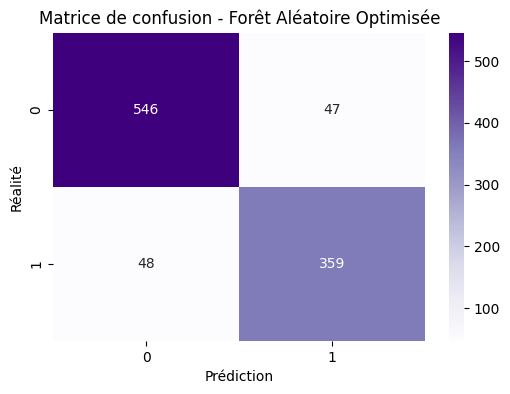

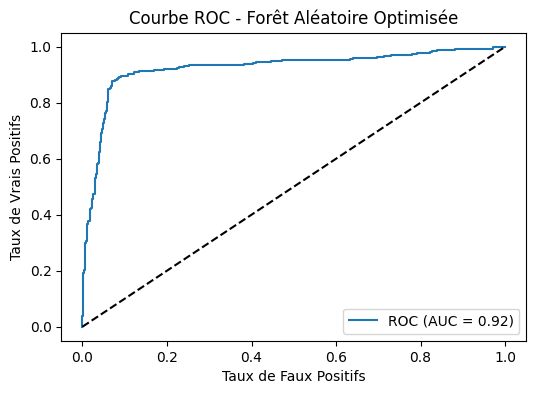

In [11]:
# Création et entraînement du modèle optimisé
rf_best = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_rf_best = rf_best.predict(X_test)

# Évaluation du modèle optimisé
print("=== Forêt Aléatoire Optimisée ===")
print("Exactitude :", accuracy_score(y_test, y_pred_rf_best))
print("Précision  :", precision_score(y_test, y_pred_rf_best))
print("Rappel     :", recall_score(y_test, y_pred_rf_best))
print("F1 Score   :", f1_score(y_test, y_pred_rf_best))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_rf_best))

# Matrice de confusion pour le modèle optimisé
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf_best, annot=True, fmt='d', cmap='Purples')
plt.title("Matrice de confusion - Forêt Aléatoire Optimisée")
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.show()

# Courbe ROC pour le modèle optimisé
y_probs_rf_best = rf_best.predict_proba(X_test)[:,1]
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test, y_probs_rf_best)
roc_auc_rf_best = auc(fpr_rf_best, tpr_rf_best)
plt.figure(figsize=(6,4))
plt.plot(fpr_rf_best, tpr_rf_best, label=f'ROC (AUC = {roc_auc_rf_best:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC - Forêt Aléatoire Optimisée")
plt.legend(loc="lower right")
plt.show()


## 7. Comparaison des modèles et synthèse des résultats

La forêt aléatoire optimisée avec GridSearchCV montre les meilleures performances avec une exactitude de 90.5%, légèrement supérieure à la forêt aléatoire non optimisée (90.3%). Voici une synthèse comparative des trois modèles testés:

| Modèle | Exactitude | Précision | Rappel | F1-Score | AUC |
|--------|------------|-----------|--------|----------|-----|
| Régression Logistique | 88.7% | 84.8% | 88.0% | 86.4% | 0.94 |
| Arbre de Décision | 80.4% | 76.0% | 75.7% | 75.9% | 0.80 |
| Forêt Aléatoire | 90.3% | **88.9%** | 87.0% | 88.0% | 0.95 |
| **Forêt Aléatoire Optimisée** | **90.5%** | 88.4% | **88.2%** | **88.3%** | **0.96** |

Les résultats montrent que:
- Les modèles d'ensemble (forêts aléatoires) surpassent nettement l'arbre de décision simple
- L'optimisation des hyperparamètres a permis une amélioration modeste mais significative
- Le rappel élevé (88.2%) de notre meilleur modèle est particulièrement important dans le contexte médical
- La matrice de confusion montre une distribution équilibrée des erreurs, suggérant une bonne généralisation

Ces performances sont prometteuses pour l'application clinique de ce modèle prédictif du cancer du poumon.

 ## 8. Perspectives d'amélioration

 - Tester d'autres techniques de prétraitement ou d'ingénierie des features.

 - Explorer d'autres modèles (ex. : SVM, Gradient Boosting).

 - Utiliser la validation croisée pour une évaluation plus robuste.